Dataset Review and Importing the libraries and Data set

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv("Churn_Modelling.csv")

In [ ]:
dataset.shape

(10000, 14)

In [ ]:
# Drop Irrelevant Columns

dataset.drop(['RowNumber','CustomerId','Surname'],axis=1, inplace = True)
dataset

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Creating new data frame with categorical and numerical columns grouped


In [ ]:
dataset.dtypes.index

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [ ]:
# List of Categorical Column Names
cat_col = []
for i in dataset.dtypes.index:   # listing the column names whose datatype is object
  if dataset.dtypes[i] == 'object':
    cat_col.append(i)

cat_col.append("HasCrCard")
cat_col.append("IsActiveMember")
cat_col

['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

In [ ]:
dataset.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [ ]:
# creating the new dataframe
data = pd.DataFrame()                      # creating an empty dataframe
for i in cat_col:
  data[i] = dataset[i]                     # appending categorical dataframes n the new data

for j in dataset.columns:                  # appending numerical dataframes n the new data
  if j not in cat_col :
    data[j] = dataset[j]
data


,Geography,Gender,HasCrCard,IsActiveMember,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited
0,France,Female,1,1,619,42,2,0.00,1,101348.88,1
1,Spain,Female,0,1,608,41,1,83807.86,1,112542.58,0
2,France,Female,1,0,502,42,8,159660.80,3,113931.57,1
3,France,Female,0,0,699,39,1,0.00,2,93826.63,0
4,Spain,Female,1,1,850,43,2,125510.82,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,France,Male,1,0,771,39,5,0.00,2,96270.64,0
9996,France,Male,1,1,516,35,10,57369.61,1,101699.77,0
9997,France,Female,0,1,709,36,7,0.00,1,42085.58,1
9998,Germany,Male,1,0,772,42,3,75075.31,2,92888.52,1


# **DATA PREPROCESSING**

In [ ]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

Taking care of missing data

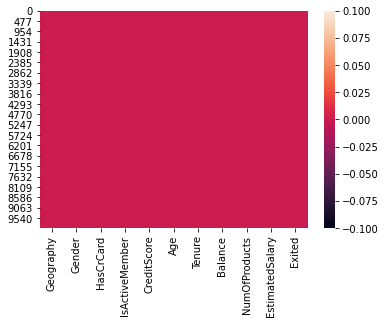

In [ ]:
sns.heatmap(data.isnull()) 
# no missing data

Encoding Categorical data

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers= [('encoder', OneHotEncoder(),[0])],remainder= 'passthrough')
x = np.array(ct.fit_transform(x))
ct = ColumnTransformer(transformers= [('encoder', OneHotEncoder(),[3])],remainder= 'passthrough')
x = np.array(ct.fit_transform(x))
ct = ColumnTransformer(transformers= [('encoder', OneHotEncoder(),[5])],remainder= 'passthrough')
x = np.array(ct.fit_transform(x))
ct = ColumnTransformer(transformers= [('encoder', OneHotEncoder(),[7])],remainder= 'passthrough')
x = np.array(ct.fit_transform(x))
x[:10,:]

array([[0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 619, 42, 2, 0.0, 1,
        101348.88],
       [0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 608, 41, 1,
        83807.86, 1, 112542.58],
       [1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 502, 42, 8,
        159660.8, 3, 113931.57],
       [1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 699, 39, 1, 0.0, 2,
        93826.63],
       [0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 850, 43, 2,
        125510.82, 1, 79084.1],
       [1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 645, 44, 8,
        113755.78, 2, 149756.71],
       [0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 822, 50, 7, 0.0, 2,
        10062.8],
       [1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 376, 29, 4,
        115046.74, 4, 119346.88],
       [0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 501, 44, 4,
        142051.07, 2, 74940.5],
       [0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 684, 27, 2,
        134603.88, 1, 71725.73]], dtype=object)

Splitting the training and test set

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)


Feature Scaling

In [ ]:
#not  required because naive bayes is bases on probability not distance based algorithm

# **Random Forest**

Model Training

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators= 100, criterion = 'entropy',n_jobs=-1,random_state = 0,min_samples_leaf=10)
classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Predicting value

In [ ]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

# **Evaluation Metrics**

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1545,   50],
       [ 207,  198]])

In [ ]:
# Accuracy Score
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test,y_pred)
ac

0.8715

In [ ]:
# Cross Validation Score
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train,y = y_train, cv= 10)
accuracies.mean()

0.8578749999999999